In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import os



In [43]:
#read data
data = pd.read_csv("heart.csv")

In [44]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
#Split Data as M&B
A = data[data.target == 1]
B = data[data.target == 0]

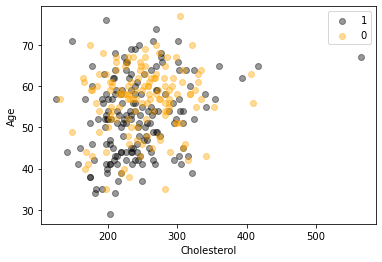

In [10]:
#Visualization, Scatter Plot

plt.scatter(A.chol,A.age,color = "Black",label="1",alpha=0.4)
plt.scatter(B.chol,B.age,color = "Orange",label="0",alpha=0.4)
plt.xlabel("Cholesterol")
plt.ylabel("Age")
plt.legend()
plt.show()


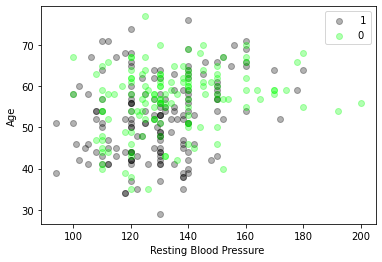

In [11]:
#Visualization, Scatter Plot

plt.scatter(A.trestbps,A.age,color = "Black",label=" 1",alpha=0.3)
plt.scatter(B.trestbps,B.age,color = "Lime",label="0",alpha=0.3)
plt.xlabel("Resting Blood Pressure ")
plt.ylabel("Age")
plt.legend()
plt.show()

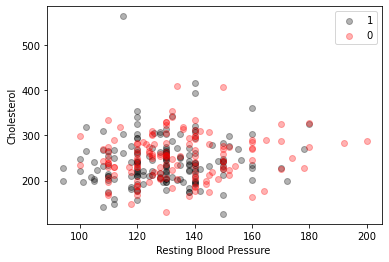

In [12]:
#Visualization, Scatter Plot

plt.scatter(A.trestbps,A.chol,color = "Black",label="1",alpha=0.3)
plt.scatter(B.trestbps,B.chol,color = "red",label="0",alpha=0.3)
plt.xlabel("Resting Blood Pressure ")
plt.ylabel("Cholesterol")
plt.legend()
plt.show()

In [16]:
#Seperate data
y =data.target.values
x1=data.drop(["target"],axis=1)

In [17]:
#Normalization 
x = (x1 - np.min(x1))/(np.max(x1)-np.min(x1)).values

#Split For Train and Test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42)

In [18]:
#transposition
xtrain = xtrain.T
xtest = xtest.T
ytrain = ytrain.T
ytest = ytest.T

In [19]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xtrain.T,ytrain.T)
print("Test Accuracy {}".format(LR.score(xtest.T,ytest.T))) 
LRscore =LR.score(xtest.T,ytest.T)

Test Accuracy 0.8524590163934426


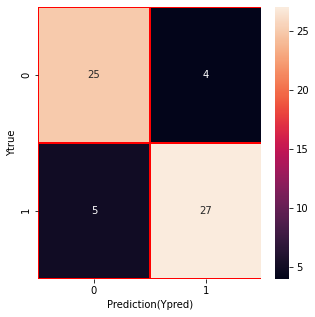

In [20]:
#Confusion Matrix

yprediciton1= LR.predict(xtest.T)
ytrue = ytest

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton1)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()


# KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier

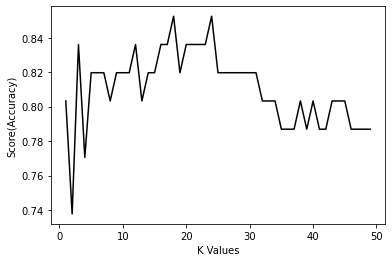

In [22]:
#Find Optimum K value
scores = []
for each in range(1,50):
    KNNfind = KNeighborsClassifier(n_neighbors = each)
    KNNfind.fit(xtrain.T,ytrain.T)
    scores.append(KNNfind.score(xtest.T,ytest.T))
    
plt.plot(range(1,50),scores,color="black")
plt.xlabel("K Values")
plt.ylabel("Score(Accuracy)")
plt.show()

In [23]:
KNNfind = KNeighborsClassifier(n_neighbors = 24) #n_neighbors = K value
KNNfind.fit(xtrain.T,ytrain.T) #learning model
prediction = KNNfind.predict(xtest.T)
print("{}-NN Score: {}".format(25,KNNfind.score(xtest.T,ytest.T)))
KNNscore = KNNfind.score(xtest.T,ytest.T)

25-NN Score: 0.8524590163934426


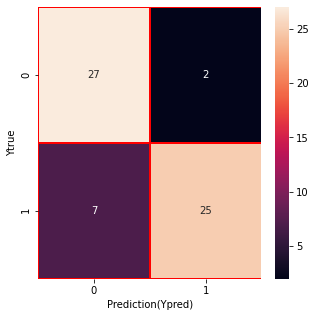

In [24]:

yprediciton2= KNNfind.predict(xtest.T)
ytrue = ytest

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton2)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

In [25]:
from sklearn.svm import SVC

SVM = SVC(random_state=42)
SVM.fit(xtrain.T,ytrain.T)  #learning 
#SVM Test 
print ("SVM Accuracy:", SVM.score(xtest.T,ytest.T))

SVMscore = SVM.score(xtest.T,ytest.T)

SVM Accuracy: 0.8360655737704918


In [26]:
#Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state=2)
DTC.fit(xtrain.T,ytrain.T) #learning
#prediciton
print("Decision Tree Score: ",DTC.score(xtest.T,ytest.T))
DTCscore = DTC.score(xtest.T,ytest.T)

Decision Tree Score:  0.8524590163934426


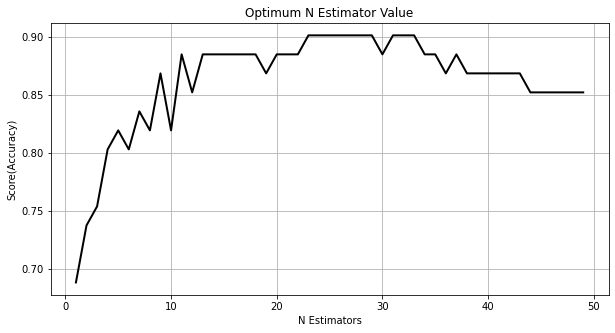

Random Forest Score:  0.9016393442622951


In [34]:
from sklearn.ensemble import RandomForestClassifier
#Find Optimum K value
scores = []
for each in range(1,50):
    RFfind = RandomForestClassifier(n_estimators = each,random_state=5)
    RFfind.fit(xtrain.T,ytrain.T)
    scores.append(RFfind.score(xtest.T,ytest.T))
    
plt.figure(1, figsize=(10, 5))
plt.plot(range(1,50),scores,color="black",linewidth=2)
plt.title("Optimum N Estimator Value")
plt.xlabel("N Estimators")
plt.ylabel("Score(Accuracy)")
plt.grid(True)
plt.show()

RFfind= RandomForestClassifier(n_estimators = 24, random_state=5) #n_estimator = DT
RFfind.fit(xtrain.T,ytrain.T) # learning
print("Random Forest Score: ",RFfind.score(xtest.T,ytest.T))
RFCscore=RFfind.score(xtest.T,ytest.T)

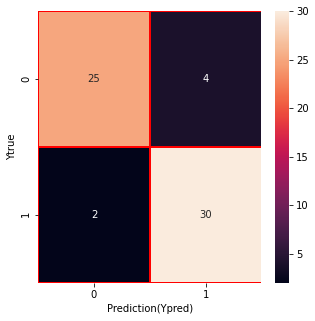

In [35]:
#Confusion Matrix

yprediciton2= RFfind.predict(xtest.T)
ytrue = ytest

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton2)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

In [38]:
scores=[LRscore,KNNscore,SVMscore,DTCscore,RFCscore]
AlgorthmsName=["Logistic Regression","K-NN","SVM","Decision Tree", "Random Forest"]

#create traces

trace1 = go.Scatter(
    x = AlgorthmsName,
    y= scores,
    name='Algortms Name',
    marker =dict(color='rgba(0,255,0,0.5)',
               line =dict(color='rgb(0,0,0)',width=2)),
                text=AlgorthmsName
)
data = [trace1]

layout = go.Layout(barmode = "group",
                  xaxis= dict(title= 'ML Algorithms',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Prediction Scores',ticklen= 5,zeroline= False))
fig = go.Figure(data = data, layout = layout)
iplot(fig)